### Imports

In [1]:
from pathlib import Path
import numpy as np
import torch
from visualization.visualize_helper import *

work_dir = Path().cwd() 

fig_save_dir = work_dir / "visualization" / "sample_figures"
if not fig_save_dir.exists():
    Path.mkdir(fig_save_dir)

# Linear system

In [2]:
exp_name = 'LQ-reftrack'
opt = -0.24542893

batch_sizes = ['64']
n_batches = 101
n_seeds = 130
seeds, batches = np.arange(n_seeds), np.arange(n_batches)

base_dir = work_dir.parents[0] / "logs" / exp_name
assert base_dir.exists()

In [3]:
# exlude seeds where any method encounters infeasible optimization
methods = ['REINFORCE/algo_REINFORCE_init_A_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack',
           'BO/algo_BO_init_A_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack',
           'REINFORCE/algo_REINFORCE_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack',
           'BO/algo_BO_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack']

valid_seeds = check_seed_validity(base_dir, methods, batch_sizes, n_seeds, n_batches)

In [4]:
# learning B (4 parameters)
methods = ['REINFORCE/algo_REINFORCE_init_A_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack',
           'BO/algo_BO_init_A_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack']

res = get_results(base_dir, methods, batch_sizes, batches, valid_seeds, n_batches)
sorted_res = sort_results(res, methods, batch_sizes, valid_seeds)

sorted_reg = opt - sorted_res
sorted_avgs = np.mean(sorted_reg, axis=-1)
sorted_stds = np.std(sorted_reg, axis=-1)
sorted_avgs, sorted_errs = mean_confidence_interval(sorted_reg)
data_4p = {"avgs": sorted_avgs, "errs": sorted_errs}

In [5]:
# learning A & B (20 parameters)
methods = ['REINFORCE/algo_REINFORCE_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack',
           'BO/algo_BO_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack']

res = get_results(base_dir, methods, batch_sizes, batches, valid_seeds, n_batches)
sorted_res = sort_results(res, methods, batch_sizes, valid_seeds)

sorted_reg = opt - sorted_res
sorted_avgs = np.mean(sorted_reg, axis=-1)
sorted_stds = np.std(sorted_reg, axis=-1)
sorted_avgs, sorted_errs = mean_confidence_interval(sorted_reg)
data_20p = {"avgs": sorted_avgs, "errs": sorted_errs}

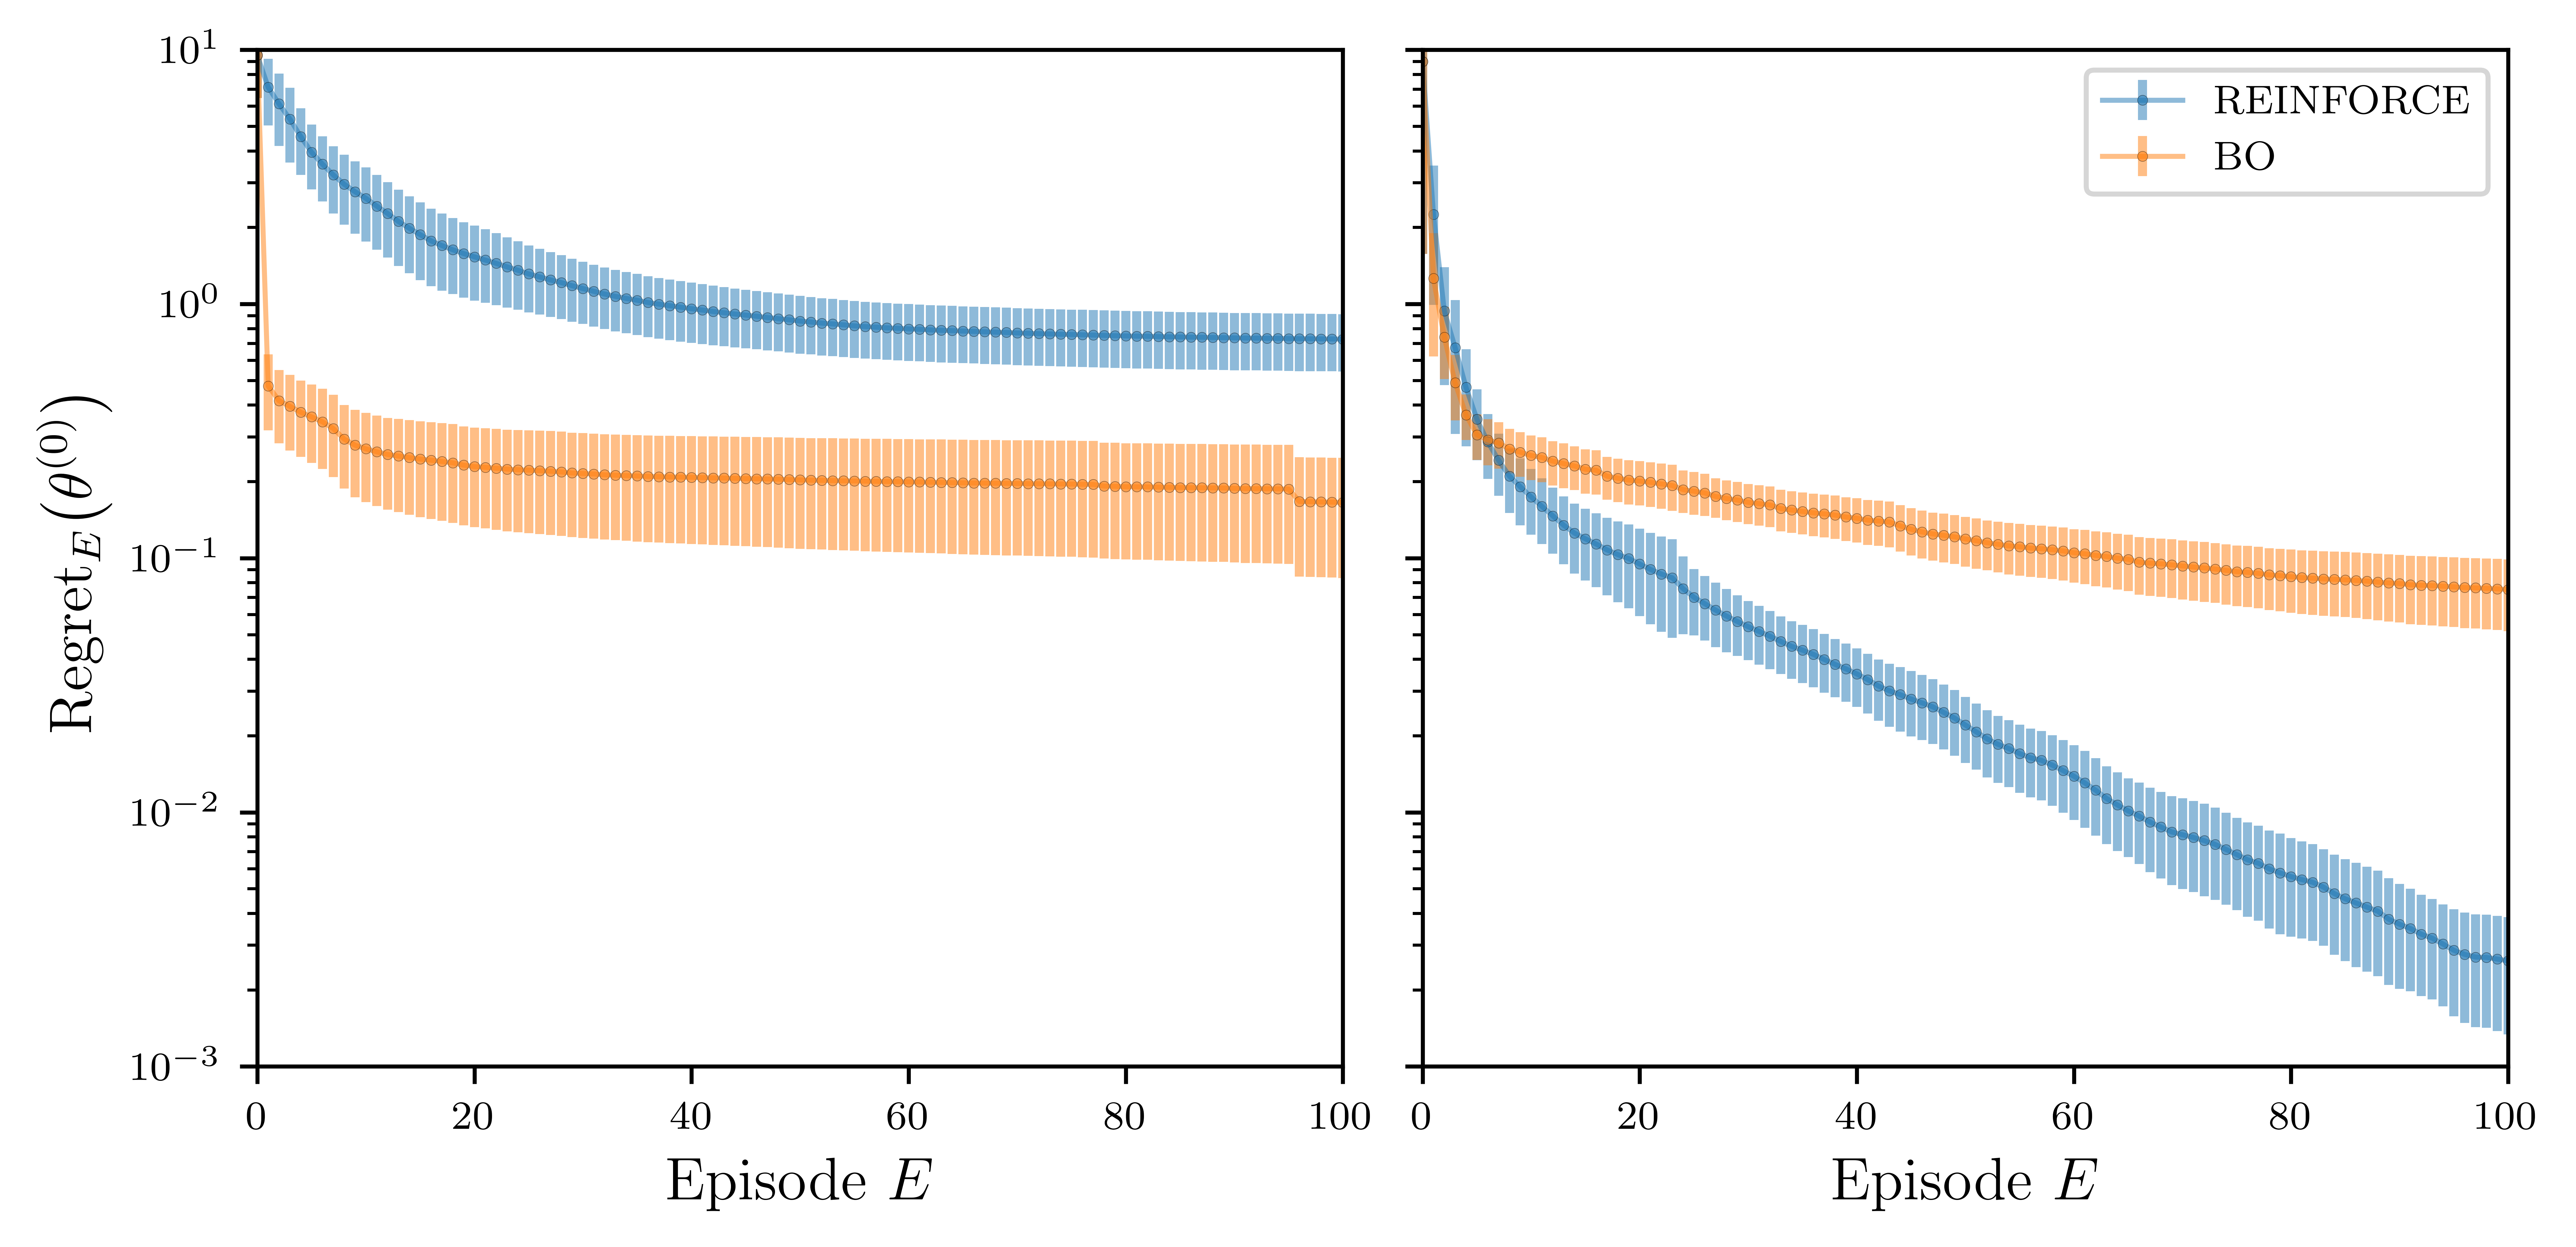

In [6]:
plot_methods = ['REINFORCE', 'BO']
plot_methods1 = plot_methods
plot_methods2 = plot_methods
fn = 'visualization/sample_figures/LQ_J/LQ_J_420_param'
save_dir = (work_dir / fn).parents[0]
Path.mkdir(save_dir, exist_ok=True)
plot_2xJ(batches, data_4p, plot_methods1, data_20p, plot_methods2, batch_sizes, fn)

In [7]:
batch_size = 64
select_seed = 14
batches = [0,10,20,30,40,50,60,70,80,90,100]
T = 10

['REINFORCE/algo_REINFORCE_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack', 'BO/algo_BO_init_None_num_epi_batches_101_policy_type_CVXPY_task_LQ-reftrack'] 16


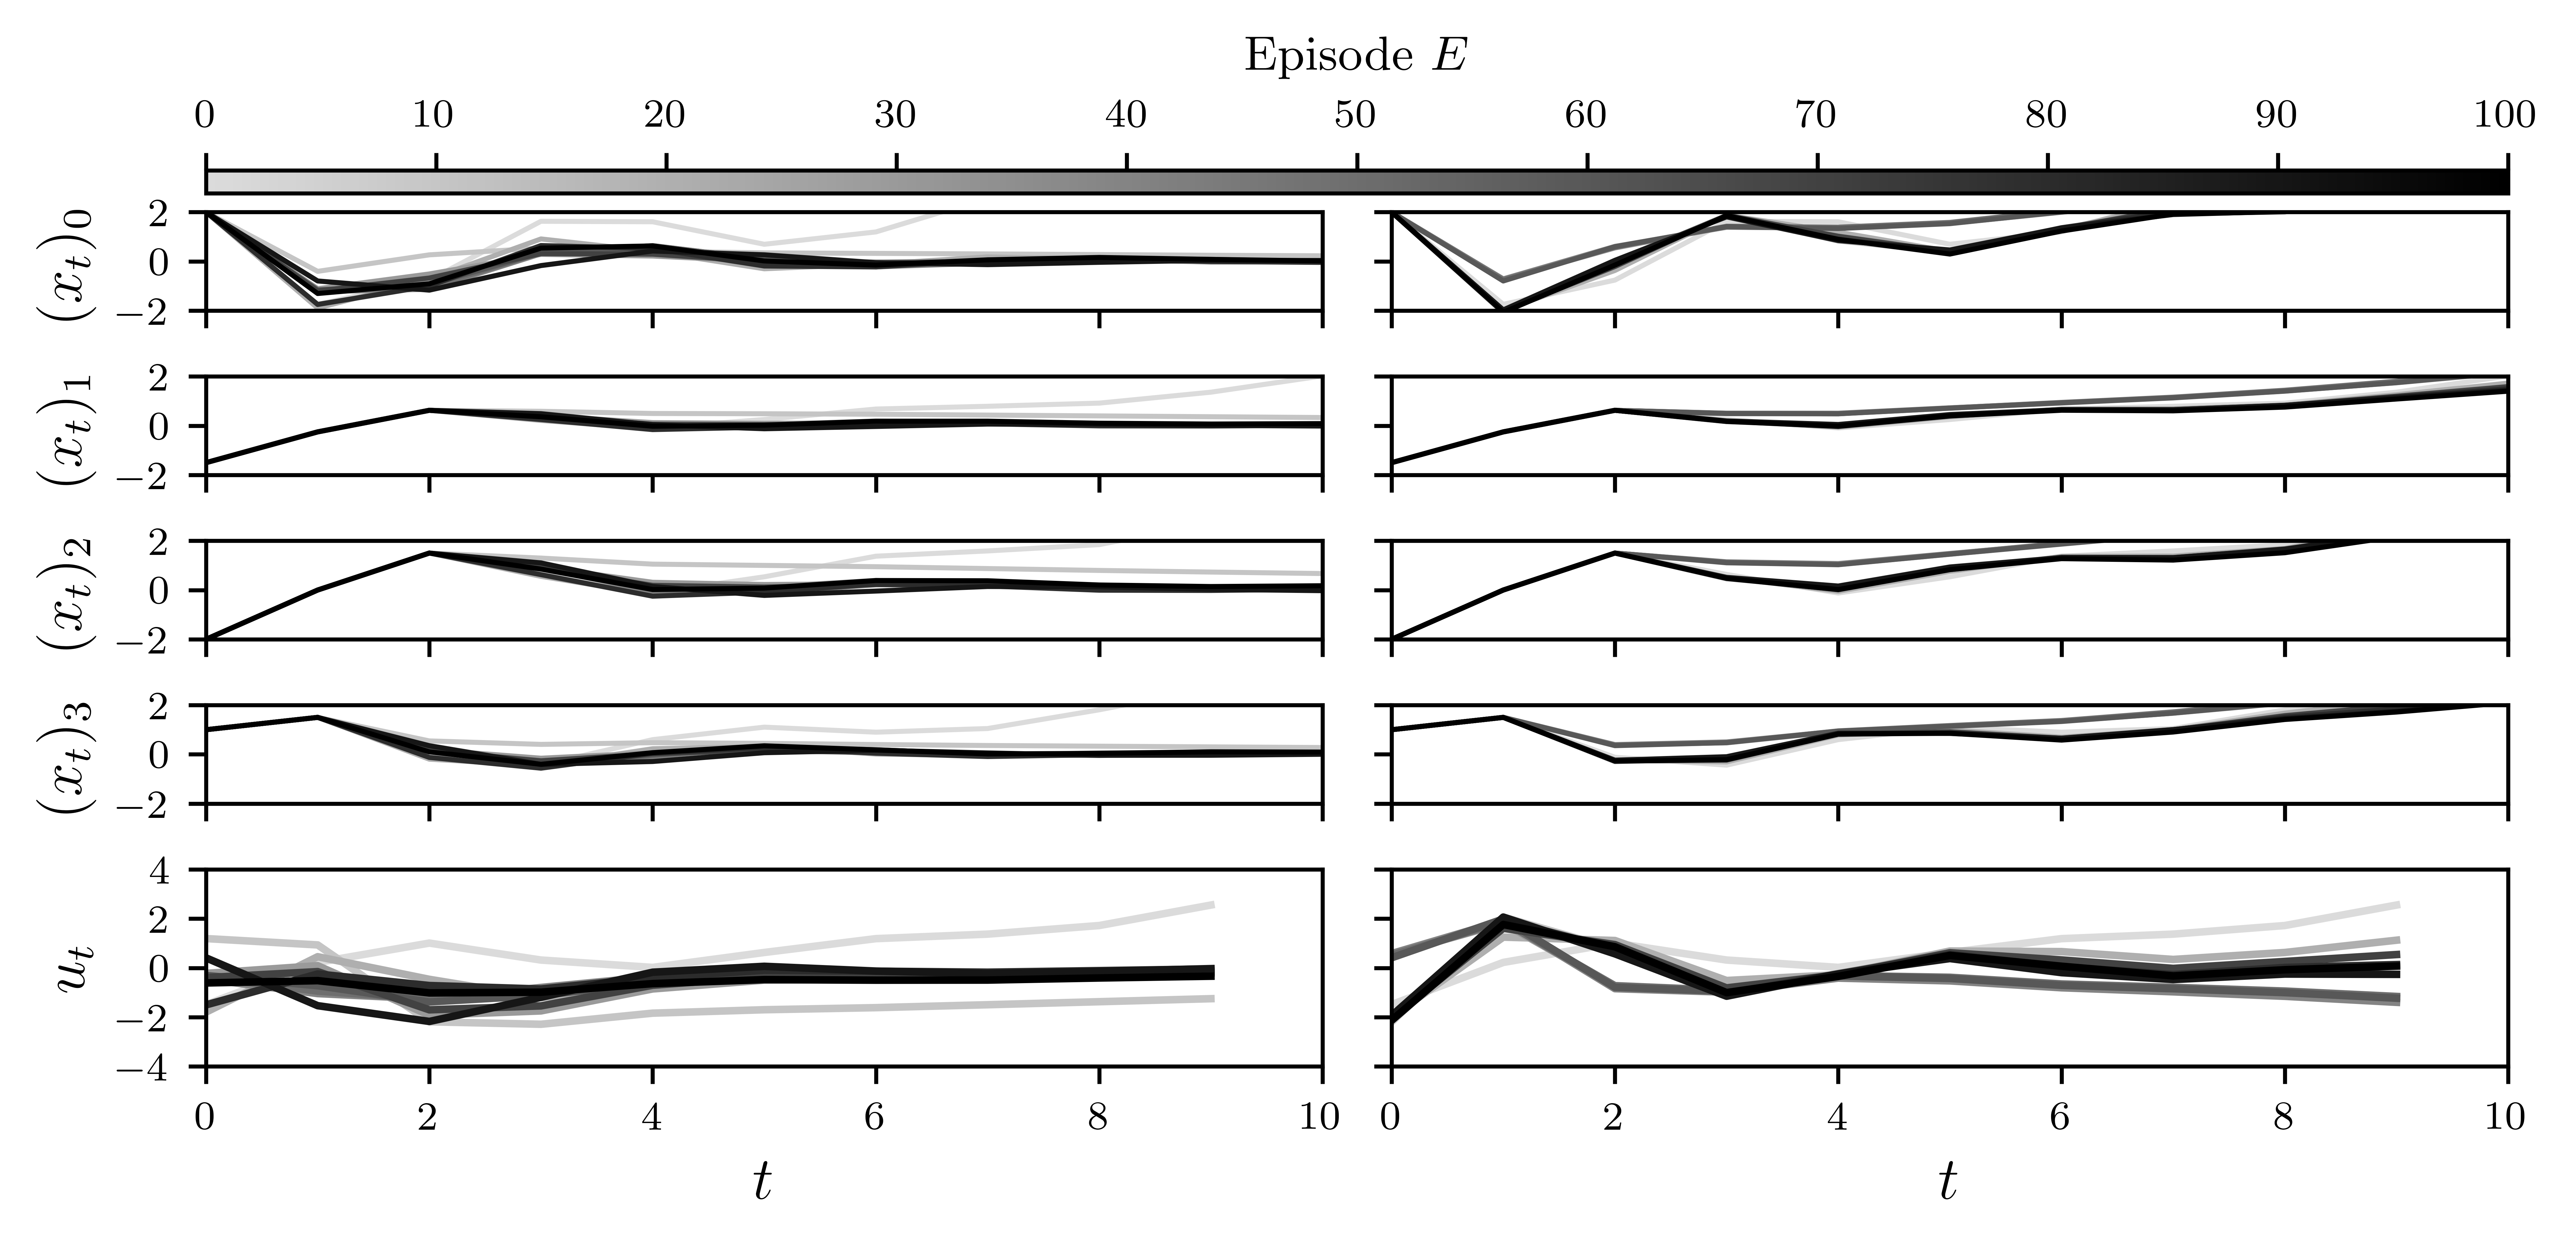

In [ ]:
save_dir = Path("visualization/sample_figures/LQ_2xtraj")
Path.mkdir(save_dir, exist_ok=True)

seeds_of_interest = [select_seed]
data = [None] * len(methods)
for seed in seeds_of_interest:
    print(methods, seed)
    for i, method in enumerate(methods):
        xs, us, rs = get_trajs(base_dir, method, batch_size, batches, seed, T, 4, 1)
        data[i] = {"xs": xs, "us": us, "rs": rs}
    for data_i in data:
        for key in data_i.keys():
            data_i[key] = torch.mean(data_i[key], dim=1)
    fn = f"visualization/sample_figures/LQ_2xtraj/LQ_2xtraj_{seed}"
    plot_LQ_2xtrajs(data[0], data[1], T, batches, seed, fn)    

In [9]:
A = 0.5 * np.array([
    [1., 0., 2., 0.],
    [0., 1., 0., 1.],
    [0., 0., 1., 2.],
    [1., 0., 0., 1.],
])
B = np.array([
    [0.5],
    [0.],
    [0.],
    [0.]
])

In [10]:
batches = np.arange(n_batches)
res_A, res_B = get_matrices(base_dir, methods, batch_sizes, batches, valid_seeds)
norm = "fro"
mean_frob_A, mean_frob_B, err_frob_A, err_frob_B = calc_norm(res_A, res_B, A, B, norm)

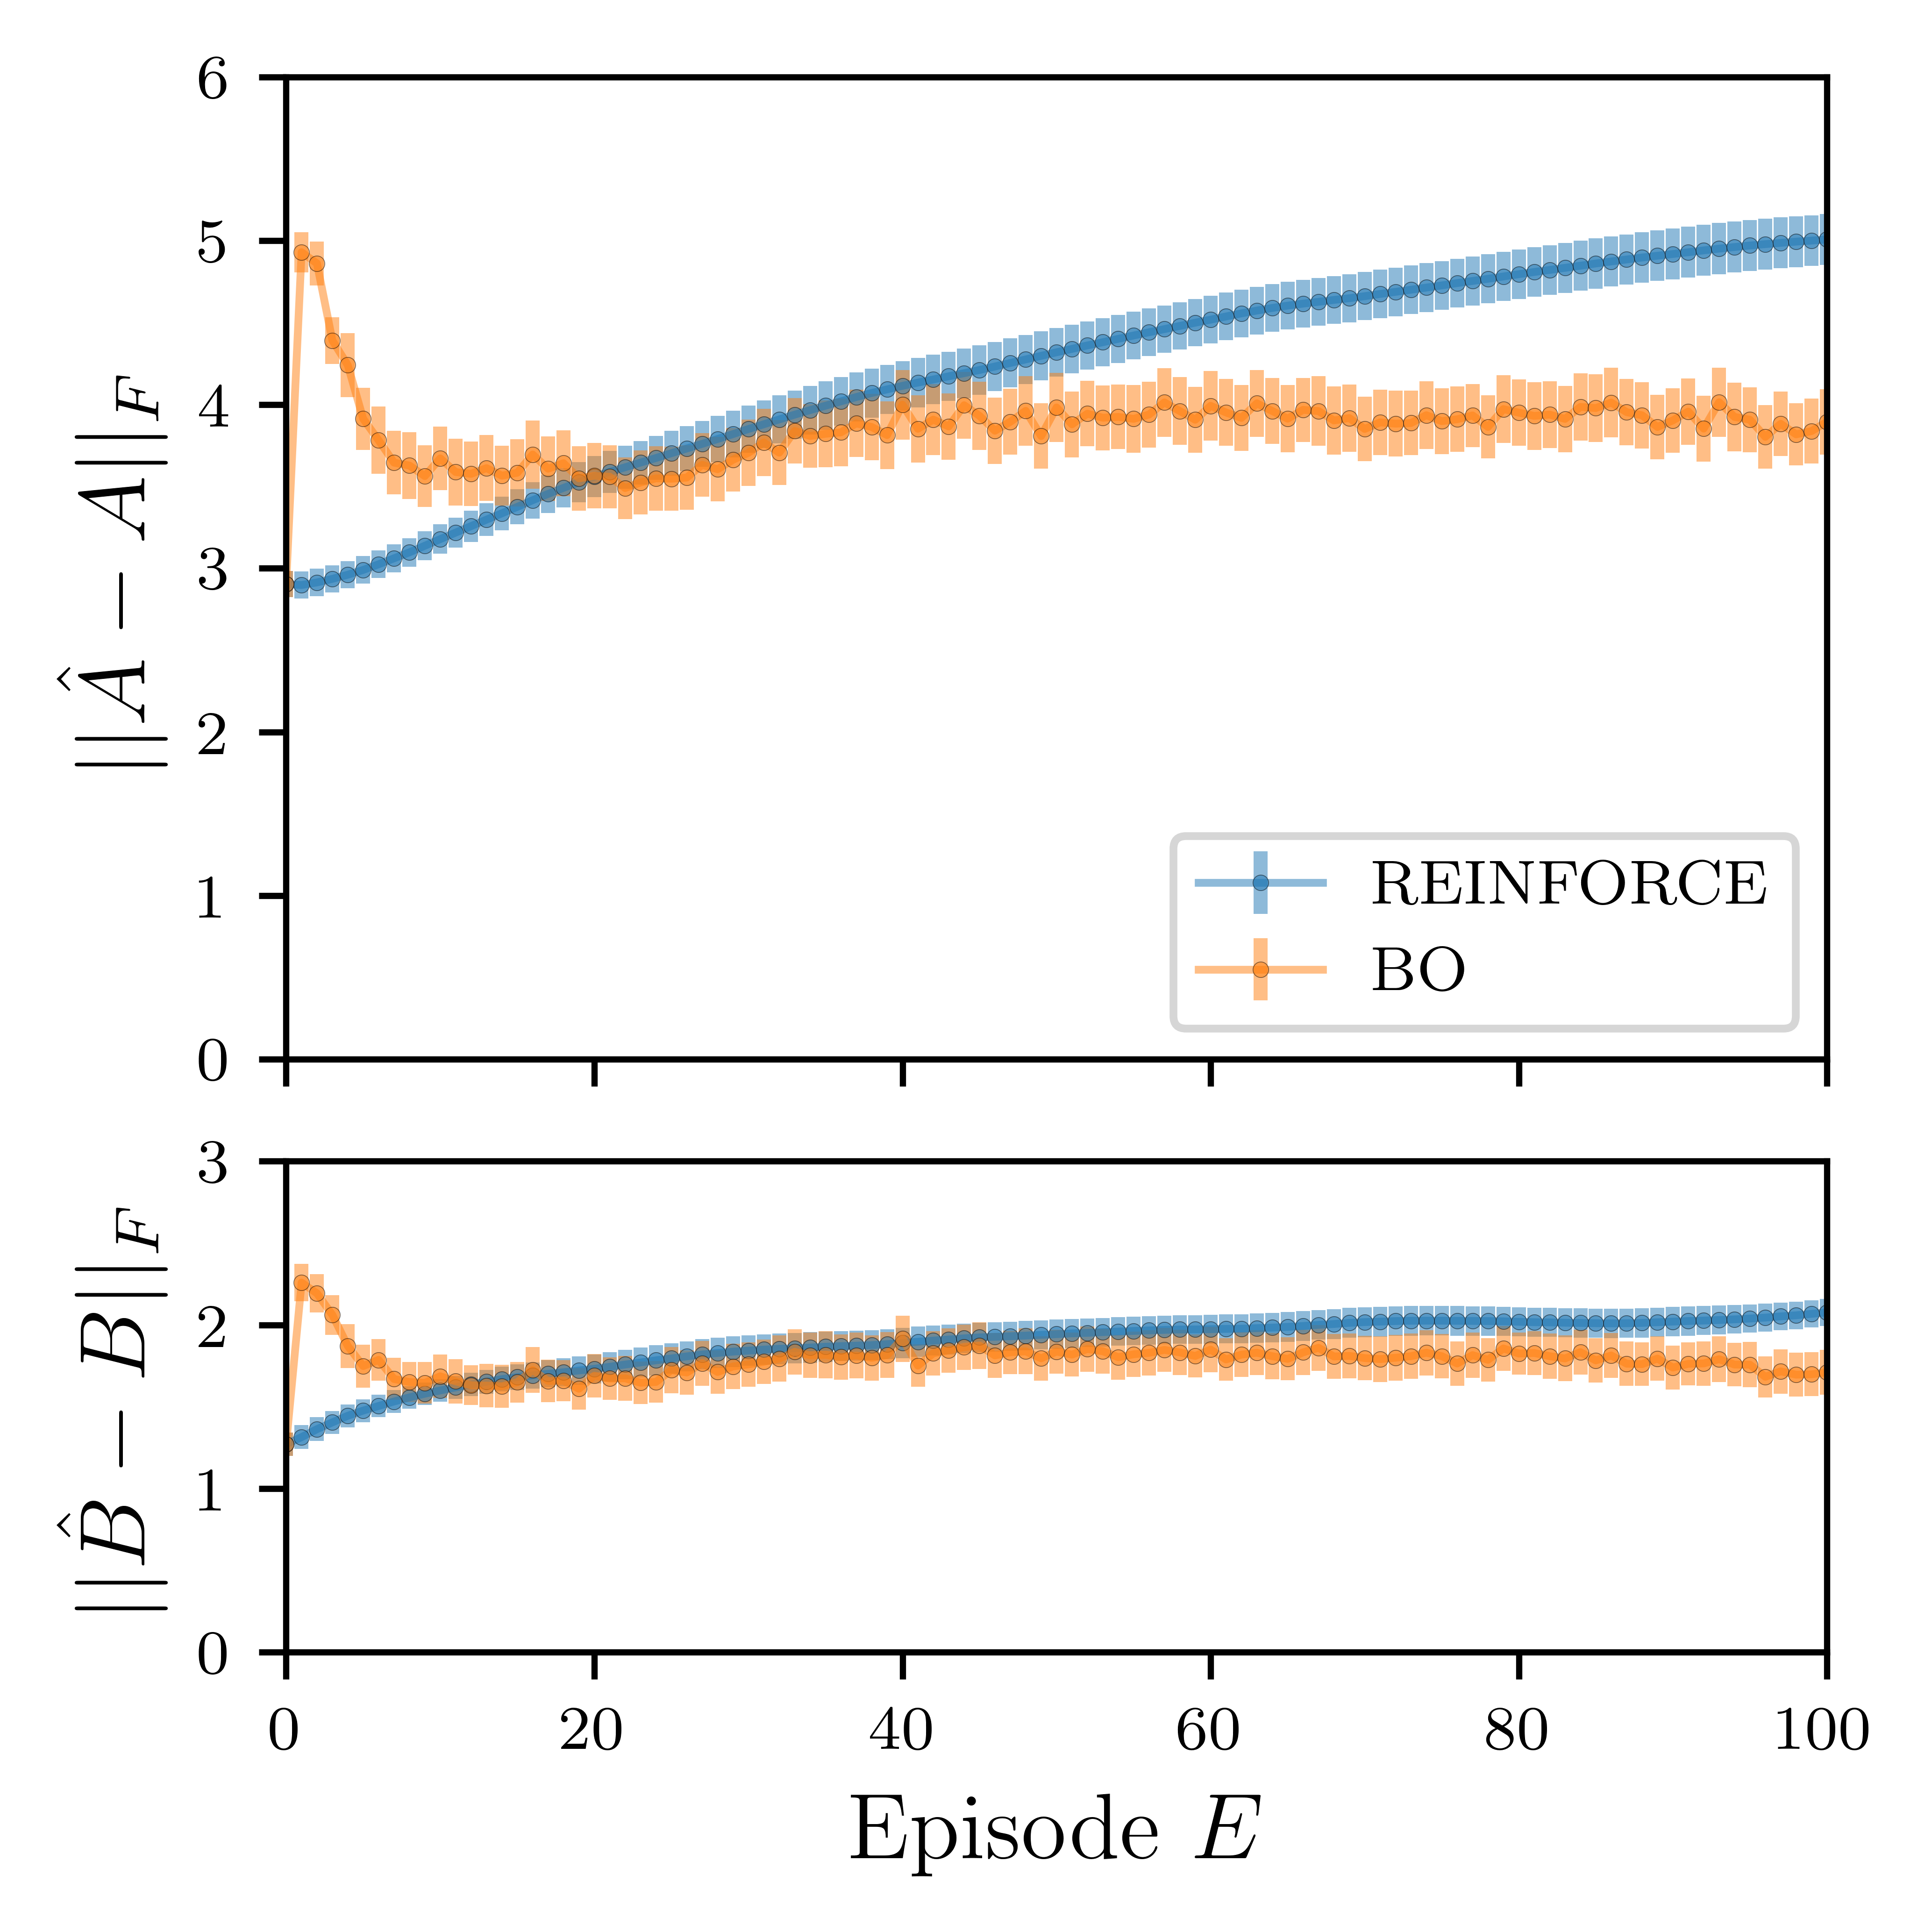

In [11]:
save_dir = Path("visualization/sample_figures/LQ_mismatch")
Path.mkdir(save_dir, exist_ok=True)

fn = 'visualization/sample_figures/LQ_mismatch/LQ_mismatch_20_param'
plot_norms(batches, mean_frob_A, mean_frob_B, err_frob_A, err_frob_B, plot_methods, batch_sizes, fn)

# Quadruple tank system

In [12]:
exp_name = "QT-reftrack"
opt = 0.
methods = ['REINFORCE']
batch_sizes = ['8']
n_batches = 41
n_seeds = 10
seeds, batches = np.arange(n_seeds), np.arange(n_batches)

select_seed = 8
batch_size = int(batch_sizes[0])
batches = [0,10,20,30,40]
T = 600

base_dir = work_dir.parents[0] / "logs" / exp_name
assert base_dir.exists()

REINFORCE 8


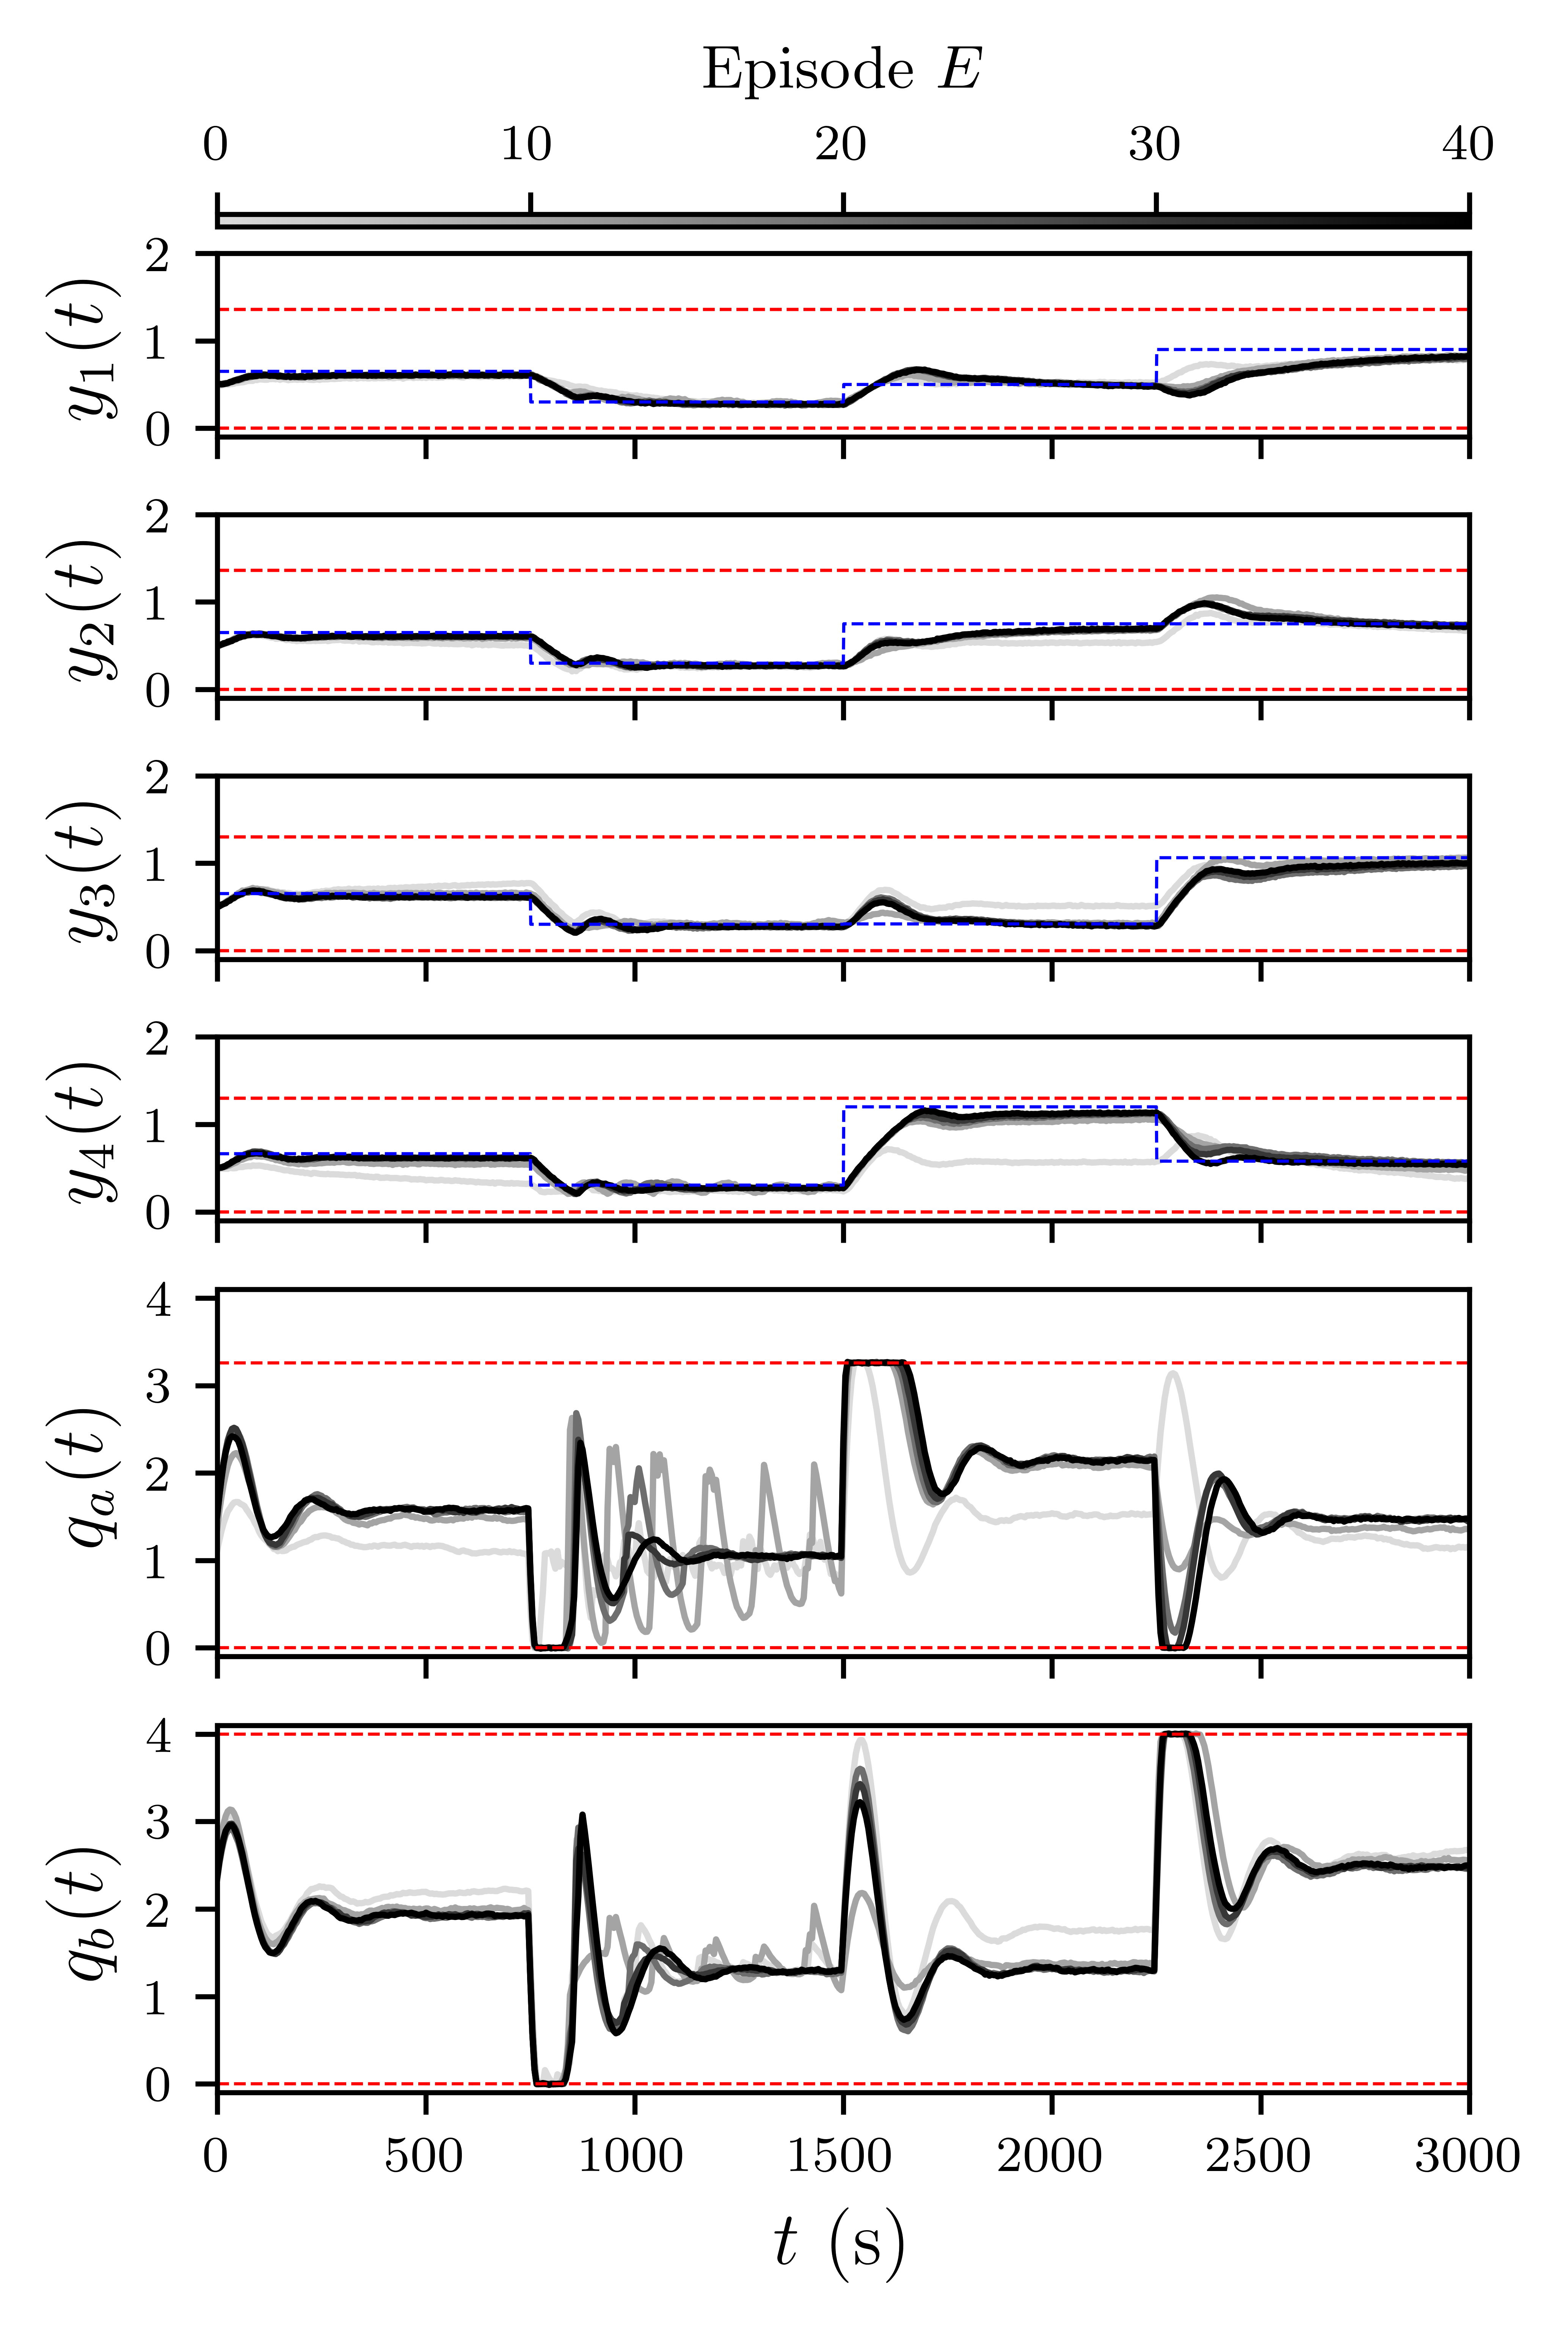

In [ ]:
save_dir = Path("visualization/sample_figures/QT_traj")
Path.mkdir(save_dir, exist_ok=True)

seeds_of_interest = [select_seed]
for seed in seeds_of_interest:
    for method in methods:
        print(method, seed)
        fn = f"visualization/sample_figures/QT_traj/QT_traj_{method}_{seed}"
        xs, us, rs = get_trajs(base_dir, method, batch_size, batches, seed, T, 4, 2)
        plot_QT_trajs(torch.mean(xs, dim=1), torch.mean(us, dim=1), T, batches, seed, fn)    